<a href="https://colab.research.google.com/github/Tasneem116/ML_Projects/blob/main/regression_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Understanding the problem statement

dataset regarding a product sales, and want to predict how much our product sales increases through our TV Advertising, model has to predict it


In [ ]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# load the data

df=pd.read_csv('/content/Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

## Data preprocessing

In [ ]:
# droping the column which is not required

df.drop(columns=df.columns[0], axis=1,  inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Text(0.5, 1.0, 'Scatter Plot')

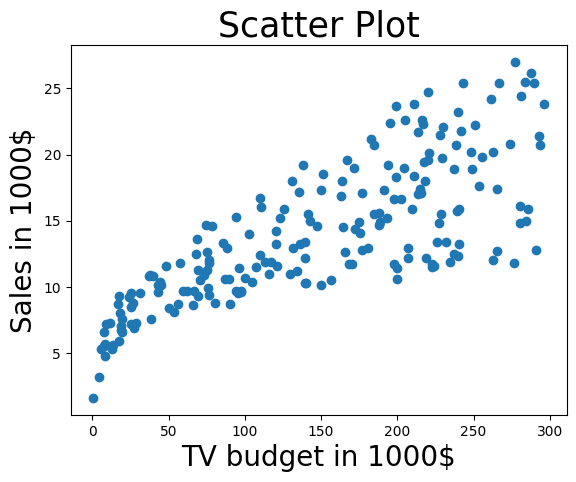

In [ ]:
# Select variables and draw a scatter Plot

x = df['TV'].values # predictor
y = df['Sales'].values #response or output variable

plt.scatter(x,y)

plt.xlabel('TV budget in 1000$' ,fontsize=20)
plt.ylabel('Sales in 1000$',fontsize=20)
plt.title('Scatter Plot',fontsize=25)

##Train-Test Split

In [ ]:
#Split Data set

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)

In [ ]:
x_train.shape, x_test.shape

((140,), (60,))

The code snippet is a way of finding the best value of K for the KNN algorithm by comparing the MSEs for different values of K. The best value of K is the one that minimizes the MSE. To find it, we can loop through the knn_dict dictionary and find the key that has the lowest value.

##Performing KNeighbors Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

k_list=np.arange(1,80,1)

knn_dict={} # To store k and mse pairs
dgkfjgkhjojffhfguh tashi is the
for i in k_list:
#Knn Model Creation

    knn=KNeighborsRegressor(n_neighbors=int(i))
    model_knn=knn.fit(np.array(x_train).reshape(-1,1),y_train)
    y_knn_pred=model_knn.predict(np.array(x_test).reshape(-1,1))

#Storing MSE
    mse=mean_squared_error(y_test,y_knn_pred)
    knn_dict[i]=mse    #1:23, 2:34, 3:45,...7:10........ 80:50

The code snippet is a way of visualizing the performance of the KNN algorithm for different values of K. The plot shows how the MSE changes as K increases. The best value of K is usually where there is an elbow or a bend in the plot, which means that increasing K further does not improve the MSE significantly.


Text(0.5, 1.0, 'ELBOW PLOT')

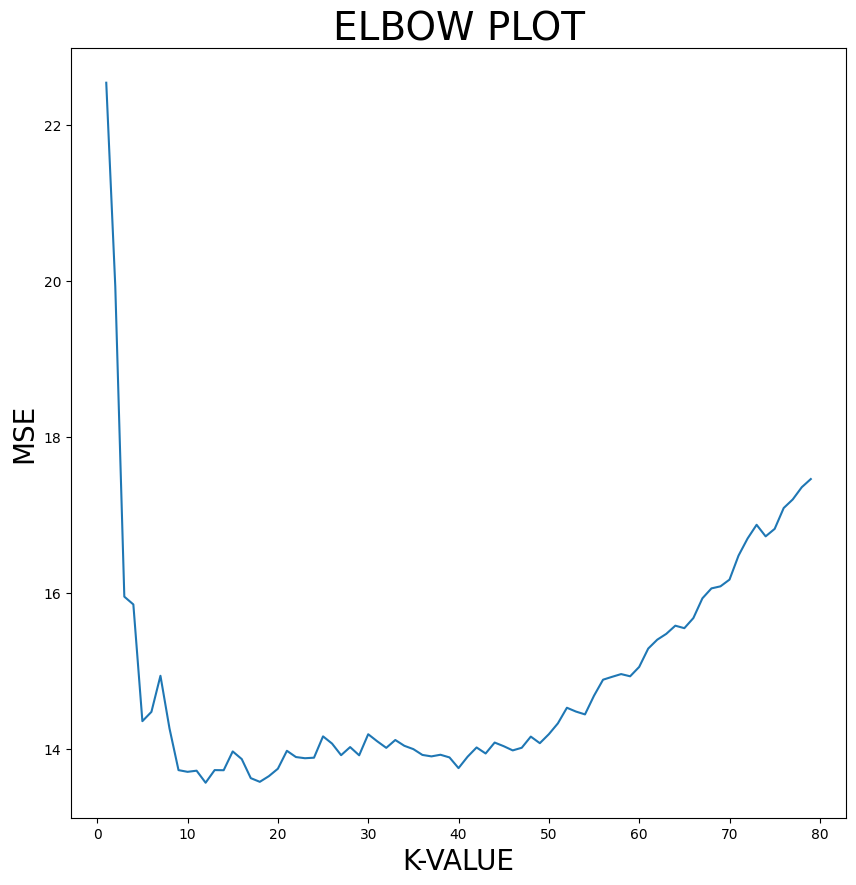

In [ ]:
#Plotting the results

fig,ax=plt.subplots(figsize=(10,10))
ax.plot(knn_dict.keys(),knn_dict.values())
ax.set_xlabel('K-VALUE', fontsize=20)
ax.set_ylabel('MSE' ,fontsize=20)
ax.set_title('ELBOW PLOT' ,fontsize=28)

The graph shows that the MSE is very high when K is 1, which means that the model is very sensitive to noise and outliers. As K increases, the MSE decreases, which means that the model becomes more general and smooth. However, after a certain point, the MSE starts to increase again, which means that the model becomes too simple and does not capture the patterns or relationships in the data well.

The best value of K is usually where there is an elbow or a bend in the graph, which means that increasing K further does not improve the MSE significantly. In this case, it seems that the optimal K value is around 10 or 11, as the MSE is the lowest at that point. This means that using 10 or 11 nearest neighbors to make predictions gives the best results for this data set.

In [ ]:
l=min(knn_dict.values())
key = [k for k, v in knn_dict.items() if v == l]
key[0]


12

The code snippet is a way of finding the best value of K for the KNN algorithm by comparing the MSEs for different values of K. The best value of K is the one that minimizes the MSE. To find it, we can loop through the knn_dict dictionary and find the key that has the lowest value.

In [ ]:
knn_min=KNeighborsRegressor(n_neighbors=key[0])
model_knn=knn_min.fit(np.array(x_train).reshape(-1,1),y_train)


In [ ]:
y_knn_pred=knn_min.predict(np.array(x_test).reshape(-1,1))

In [ ]:
# y_knn_pred=knn_min.predict(np.array(17.2).reshape(-1,1))

In [ ]:
y_knn_pred

array([12.05833333, 17.13333333, 11.16666667, 17.95      , 17.18333333,
       16.33333333, 13.06666667, 19.53333333, 18.55833333,  6.28333333,
       10.35      , 13.16666667, 10.74166667,  6.65      ,  6.28333333,
       18.70833333, 19.425     , 10.275     ,  8.575     , 15.15      ,
       17.41666667, 16.425     ,  7.78333333, 17.59166667, 19.53333333,
       15.11666667, 17.975     , 11.88333333, 17.38333333,  9.85833333,
       10.55833333, 13.625     , 11.6       ,  6.28333333, 19.53333333,
       16.425     ,  6.28333333, 19.53333333, 13.10833333, 18.51666667,
       12.33333333, 19.53333333, 17.41666667, 13.41666667, 15.30833333,
       13.10833333, 17.59166667, 17.95      , 13.06666667, 18.075     ,
       14.575     ,  7.95833333, 11.16666667, 11.225     , 14.825     ,
       11.16666667, 19.53333333, 15.775     , 17.65833333, 19.53333333])

model evaluation

In [ ]:
mse=mean_squared_error(y_test,y_knn_pred)
mse

13.568927083333335

In [ ]:
observations = pd.DataFrame(y_test,y_knn_pred)
observations
#observed   #Prediction

,0
12.058333,14.0
17.133333,20.7
11.166667,12.0
17.950000,11.4
17.183333,15.6
16.333333,11.7
13.066667,14.2
19.533333,14.8
18.558333,17.4
6.283333,1.6
